# Import modules


In [462]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
Planted trees in the metropole of grenoble.\
Source: [metropole grenoble](https://data.metropolegrenoble.fr/visualisation/information/?id=arbres-grenoble&disjunctive.sous_categorie_desc&disjunctive.espece&location=12,45.18821,5.74699)

In [463]:
df=pd.read_csv(
    'data/arbres_grenoble_epsg4326.csv',
    sep=',',
    index_col=0
)

In [464]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


# Clean
## Full of na

In [465]:
#I drop columns that are full of na
df.dropna(axis=1,how='all',inplace=True)
#I drop lines that are full of na
df.dropna(axis=0,how='all',inplace=True)
df.columns.values

array(['code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'identifiantplu', 'typeimplantationplu',
       'intituleprotectionplu', 'collectivite', 'stationmetro',
       'hauteurarbre', 'portarbre', 'structure', 'forme', 'typenature',
       'geo_point_2d'], dtype=object)

## Missing plantation year

In [466]:
#I delete the row where we don't a year for the planting
df.dropna(axis=0, subset=['anneedeplantation'], inplace=True)

## Rename columns

In [467]:
#I rename columns to clearer names
dict_to_rename_columns=dict(
    stadededeveloppement='stade_de_developpement',
    anneedeplantation='annee_de_plantation',
    raisondeplantation='raison_de_plantation',
    traitementchenilles='traitement_chenilles',
    identifiantplu='identifiant_plu',
    typeimplantationplu='type_implantation_plu',
    intituleprotectionplu='intitule_protection_plu',
    stationmetro='station_metro',
    hauteurarbre='hauteur_arbre',
    portarbre='port_arbre',
    typenature='type_nature'
)
df.rename(columns=dict_to_rename_columns, inplace=True)

In [468]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,type_implantation_plu,intitule_protection_plu,collectivite,station_metro,hauteur_arbre,port_arbre,structure,forme,type_nature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


## One unique value

In [469]:
#I drop and store in a dict columns that only have one value
dict_column_one_value=dict()
for col in df.columns:
    if df[col].unique().shape[0]<=1:
        dict_column_one_value[col]=df[col].unique()[0]
        df.drop(col, inplace=True, axis='columns')
dict_column_one_value

{'genre': 'VEG',
 'genre_desc': 'VEGETATION',
 'categorie': 'ESP01',
 'categorie_desc': 'Arbre'}

## Less 20% Na values

In [470]:
dict_column_too_many_na=dict()
threshold=df.shape[0]*0.2
for col in df.columns:
    if df[col].isna().value_counts().shape[0]==2:
        if df[col].isna().value_counts().loc[True]>=threshold:
            pct=df[col].isna().value_counts().loc[True]/df.shape[0]*100
            dict_column_too_many_na[col]=f"{round(pct,2)}%"
            df.drop(col, inplace=True, axis='columns')
dict_column_too_many_na

{'variete': '84.77%',
 'remarques': '83.04%',
 'raison_de_plantation': '88.96%',
 'traitement_chenilles': '93.0%',
 'identifiant_plu': '98.01%',
 'type_implantation_plu': '83.19%',
 'intitule_protection_plu': '98.01%',
 'station_metro': '93.63%',
 'port_arbre': '37.9%',
 'forme': '71.68%',
 'type_nature': '37.9%'}

## Only unique values

In [471]:
list_column_unique=list()
for col in df.columns:
    if df[col].unique().shape[0]==df.shape[0]:
        list_column_unique.append(col)
list_column_unique

['code', 'nom', 'bien_reference', 'geo_point_2d']

In [472]:
df[df['nom']!=df['bien_reference']]

,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stade_de_developpement,annee_de_plantation,collectivite,hauteur_arbre,structure,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,


Name and bien_referenbce are the same.\
I'll drop those two and code

In [473]:
list_column_unique.remove('geo_point_2d')
print(list_column_unique)
df.drop(columns=list_column_unique, inplace=True)

['code', 'nom', 'bien_reference']


# Strucutre

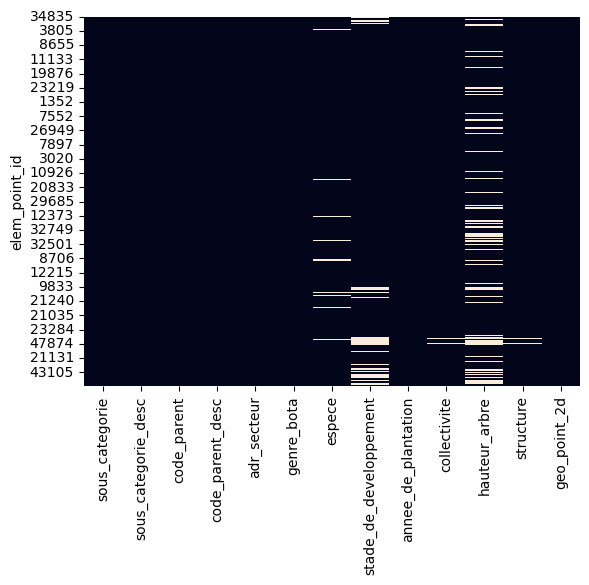

In [474]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Pickle

In [475]:
df.to_pickle(
    'data/arbres_grenoble_clean.pkl'
)